In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.io as pio
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
plt.figure
import plotly.express as px
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 6
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from sklearn import metrics


### **Exploratory Data Analyses**

In [ ]:
global_temp = pd.read_csv("/content/GlobalTemperatures.csv")
global_temp.dtypes


dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [ ]:
global_temp.shape

(3192, 10)

In [ ]:
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [ ]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


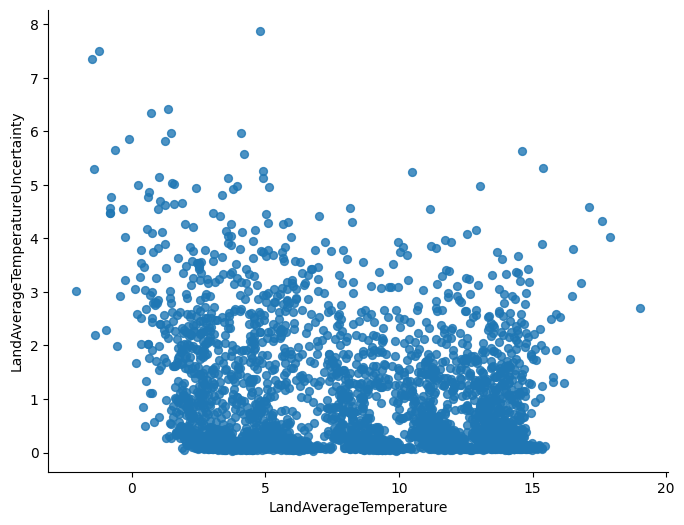

In [ ]:
# @title LandAverageTemperature vs LandAverageTemperatureUncertainty


global_temp.plot(kind='scatter', x='LandAverageTemperature', y='LandAverageTemperatureUncertainty', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
global_temp['dt'][0].split('-')[0]

'1750'

In [ ]:
def fetch_year(date):
    return date.split('-')[0]

In [ ]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [ ]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


In [ ]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [ ]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [ ]:
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [ ]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


### **DATA PREPROCESSING**

In [ ]:
df=pd.read_csv('/content/GlobalLandTemperaturesByCity.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [ ]:
egy=df[df['Country']=='Egypt']

In [ ]:
city=['Cairo']
data2=egy[egy['City'].isin(city)]
data2

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1289707,1808-10-01,22.216,1.875,Cairo,Egypt,29.74N,31.38E
1289708,1808-11-01,17.766,2.211,Cairo,Egypt,29.74N,31.38E
1289709,1808-12-01,11.338,1.971,Cairo,Egypt,29.74N,31.38E
1289710,1809-01-01,10.337,2.911,Cairo,Egypt,29.74N,31.38E
1289711,1809-02-01,12.113,2.848,Cairo,Egypt,29.74N,31.38E
...,...,...,...,...,...,...,...
1292162,2013-05-01,27.100,0.254,Cairo,Egypt,29.74N,31.38E
1292163,2013-06-01,28.392,0.482,Cairo,Egypt,29.74N,31.38E
1292164,2013-07-01,28.217,0.874,Cairo,Egypt,29.74N,31.38E
1292165,2013-08-01,28.588,0.750,Cairo,Egypt,29.74N,31.38E


In [ ]:
data2=data2[['dt','AverageTemperature']]
data2.head()

,dt,AverageTemperature
1289707,1808-10-01,22.216
1289708,1808-11-01,17.766
1289709,1808-12-01,11.338
1289710,1809-01-01,10.337
1289711,1809-02-01,12.113


In [ ]:
data2.columns=['Date','Temp']
data2.head()

,Date,Temp
1289707,1808-10-01,22.216
1289708,1808-11-01,17.766
1289709,1808-12-01,11.338
1289710,1809-01-01,10.337
1289711,1809-02-01,12.113


In [ ]:
data2['Date']=pd.to_datetime(data2['Date'])

In [ ]:
data2.isnull().sum()

Date     0
Temp    18
dtype: int64

In [ ]:
data2.dropna(inplace=True)

In [ ]:
data2.shape

(2442, 2)

In [ ]:
data2.set_index('Date',inplace=True)

### **STATIONARY CHECK**

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data2['Temp'])

In [ ]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -5.141544697190989
p-value : 1.1558749048919592e-05
#Lags Used : 24
Number of Observations Used : 2417
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
data2.head()

,Temp
Date,
1808-10-01,22.216
1808-11-01,17.766
1808-12-01,11.338
1809-01-01,10.337
1809-02-01,12.113


In [ ]:
data2['month']=data2.index.month

In [ ]:
data2['year']=data2.index.year

In [ ]:
data2.head()

,Temp,month,year
Date,,,
1808-10-01,22.216,10,1808
1808-11-01,17.766,11,1808
1808-12-01,11.338,12,1808
1809-01-01,10.337,1,1809
1809-02-01,12.113,2,1809


### **SEASONALITY**

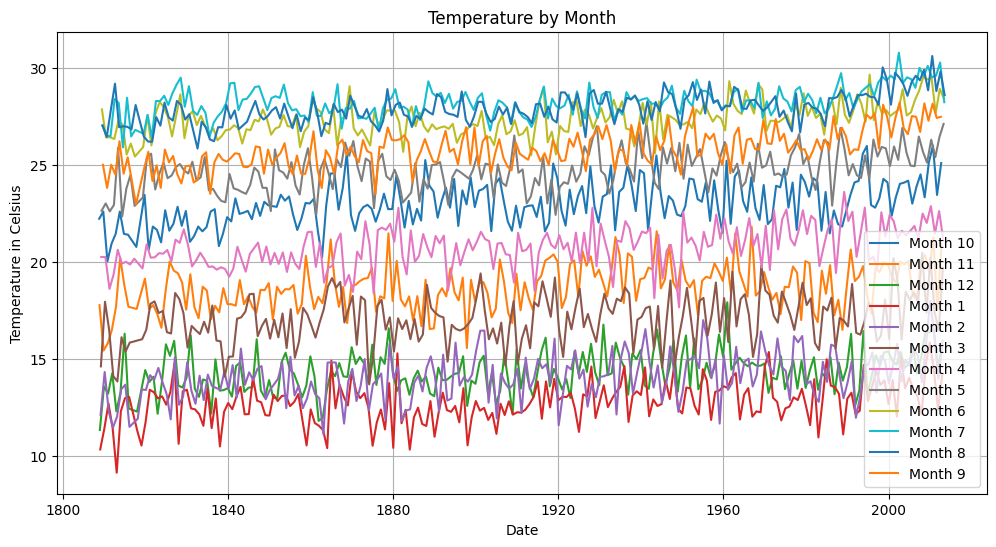

In [ ]:
months = data2['month'].unique()
plt.figure(figsize=(12, 6))
for month in months:
    plt.plot(data2[data2['month'] == month].index, data2[data2['month'] == month]['Temp'], label=f'Month {month}')
plt.title('Temperature by Month')
plt.xlabel('Date')
plt.ylabel('Temperature in Celsius')
plt.legend()
plt.grid(True)
plt.show()

### **ARIMA**

In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings('ignore')

p = range(0, 6)
d = range(0, 5)
q = range(0, 6)

pdq = itertools.product(p, d, q)

best_aic = float('inf')
best_order = None

train_size = int(len(data2) * 0.6)
train_data = data2[:train_size]
test_data = data2[train_size:]

for order in pdq:
    try:
        model = ARIMA(train_data['Temp'], order=order)
        results = model.fit()
        aic = results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = order
        print(f'ARIMA{order} - AIC: {aic:.2f}')
    except:
        continue

  #print(f'Best ARIMA model: ARIMA{best_order} - AIC: {best_aic:.2f}')

ARIMA(0, 0, 0) - AIC: 9192.16
ARIMA(0, 0, 1) - AIC: 7745.67
ARIMA(0, 0, 2) - AIC: 6890.34
ARIMA(0, 0, 3) - AIC: 6375.82
ARIMA(0, 0, 4) - AIC: 6180.52
ARIMA(0, 0, 5) - AIC: 5951.50
ARIMA(0, 1, 0) - AIC: 7447.77
ARIMA(0, 1, 1) - AIC: 6843.63
ARIMA(0, 1, 2) - AIC: 6486.60
ARIMA(0, 1, 3) - AIC: 6371.16
ARIMA(0, 1, 4) - AIC: 6275.33
ARIMA(0, 1, 5) - AIC: 6181.34
ARIMA(0, 2, 0) - AIC: 6767.40
ARIMA(0, 2, 1) - AIC: 6767.30
ARIMA(0, 2, 2) - AIC: 6662.40
ARIMA(0, 2, 3) - AIC: 6491.01
ARIMA(0, 2, 4) - AIC: 6375.25
ARIMA(0, 2, 5) - AIC: 6279.01
ARIMA(0, 3, 0) - AIC: 7841.98
ARIMA(0, 3, 1) - AIC: 6773.06
ARIMA(0, 3, 2) - AIC: 7065.85
ARIMA(0, 3, 3) - AIC: 6667.72
ARIMA(0, 3, 4) - AIC: 6661.67
ARIMA(0, 3, 5) - AIC: 6662.46
ARIMA(0, 4, 0) - AIC: 9563.82
ARIMA(0, 4, 1) - AIC: 7846.91
ARIMA(0, 4, 2) - AIC: 7607.97
ARIMA(0, 4, 3) - AIC: 7072.37
ARIMA(0, 4, 4) - AIC: 6681.33
ARIMA(0, 4, 5) - AIC: 6677.51
ARIMA(1, 0, 0) - AIC: 7341.01
ARIMA(1, 0, 1) - AIC: 6686.72
ARIMA(1, 0, 2) - AIC: 6284.76
ARIMA(1, 0

### **FORECASTING**

In [ ]:
train_size = int(len(data2) * 0.8)
train_data = data2[:train_size]
test_data = data2[train_size:]

best_order = (3, 0, 2)
forecast_steps = len(test_data)
forecast = results.forecast(steps=forecast_steps)

print("Forecasted values:")
forecast

Forecasted values:


1465        23.761514
1466        32.206571
1467        43.090179
1468        56.388087
1469        72.016276
            ...      
1949    301374.149783
1950    302647.144044
1951    303922.959719
1952    305201.597544
1953    306483.058378
Name: predicted_mean, Length: 489, dtype: float64

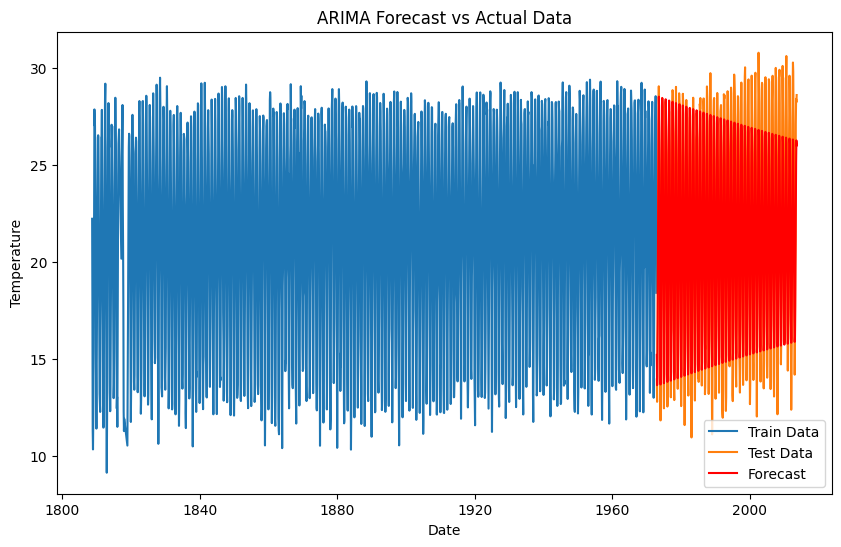

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Temp'], label='Train Data')
plt.plot(test_data.index, test_data['Temp'], label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()

In [ ]:
mae = np.mean(np.abs(forecast - test_data['Temp']))
print("\nMean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [ ]:
print("Missing values in forecast:", forecast.isnull().sum())
print("Missing values in actual data:", test_data['Temp'].isnull().sum())

print("Length of forecast:", len(forecast))
print("Length of actual data:", len(test_data['Temp']))

print("Index of forecast:", forecast.index)
print("Index of actual data:", test_data['Temp'].index)

Missing values in forecast: 0
Missing values in actual data: 0
Length of forecast: 489
Length of actual data: 489
Index of forecast: RangeIndex(start=1465, stop=1954, step=1)
Index of actual data: DatetimeIndex(['1972-12-01', '1973-01-01', '1973-02-01', '1973-03-01',
               '1973-04-01', '1973-05-01', '1973-06-01', '1973-07-01',
               '1973-08-01', '1973-09-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=489, freq=None)


In [ ]:
forecast_df = pd.DataFrame(forecast, index=test_data.index)

forecast_aligned = forecast_df.reindex(test_data.index)

mae = np.mean(np.abs(forecast_aligned.squeeze() - test_data['Temp']))
print("\nMean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): nan


In [ ]:
print("NaN values in training data:", train_data.isnull().sum())

try:
    model = ARIMA(train_data['Temp'], order=best_order)
    results = model.fit()
    print("Model fitting successful.")
except Exception as e:
    print("Error during model fitting:", e)

if 'results' in locals():
    forecast_steps = len(test_data)
    forecast = results.forecast(steps=forecast_steps)
    print("\nForecast data:\n", forecast)
else:
    print("\nModel fitting failed. Cannot generate forecast.")

NaN values in training data: Temp     0
month    0
year     0
dtype: int64
Model fitting successful.

Forecast data:
 1953    15.203854
1954    13.648144
1955    14.113597
1956    16.456024
1957    20.038011
          ...    
2437    20.195797
2438    22.905706
2439    25.121725
2440    26.251383
2441    25.993893
Name: predicted_mean, Length: 489, dtype: float64


In [ ]:
forecast_index = pd.date_range(start=test_data.index[0], periods=len(forecast), freq='MS')

forecast.index = forecast_index

print("Index of forecast data after conversion:\n", forecast.index)

Index of forecast data after conversion:
 DatetimeIndex(['1972-12-01', '1973-01-01', '1973-02-01', '1973-03-01',
               '1973-04-01', '1973-05-01', '1973-06-01', '1973-07-01',
               '1973-08-01', '1973-09-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', length=489, freq='MS')


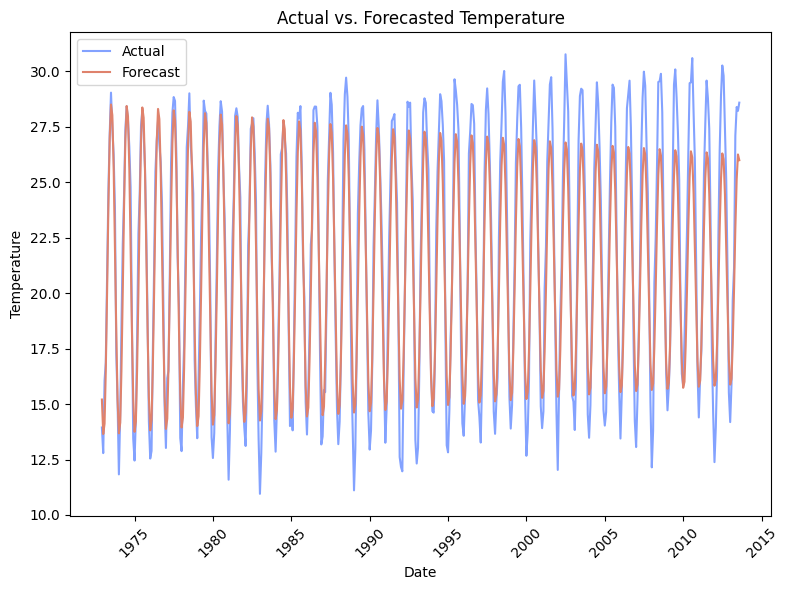

In [ ]:
plt.plot(test_data.index, test_data['Temp'], color='#83A2FF', label='Actual')

plt.plot(forecast.index, forecast, color='#DF826C', label='Forecast')

plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs. Forecasted Temperature')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_sklearn = mean_absolute_error(test_data['Temp'], forecast)

rmse_sklearn = mean_squared_error(test_data['Temp'], forecast, squared=False)

print("Mean Absolute Error (MAE)", mae_sklearn)
print("Root Mean Squared Error (RMSE)", rmse_sklearn)

Mean Absolute Error (MAE) 1.5581006436358382
Root Mean Squared Error (RMSE) 1.8522761062617485


In [ ]:
def mean_absolute_percentage_error(actual, forecast):
    mask = actual != 0
    return np.mean(np.abs((actual[mask] - forecast[mask]) / actual[mask])) * 100

def symmetric_mean_absolute_percentage_error(actual, forecast):
    mask = (actual + forecast) != 0
    return np.mean(2 * np.abs(forecast[mask] - actual[mask]) / (np.abs(forecast[mask]) + np.abs(actual[mask]))) * 100

mape = mean_absolute_percentage_error(test_data['Temp'], forecast)
smape = symmetric_mean_absolute_percentage_error(test_data['Temp'], forecast)

print("Mean Absolute Percentage Error (MAPE):", mape)
print("Symmetric Mean Absolute Percentage Error (SMAPE):", smape)

Mean Absolute Percentage Error (MAPE): 7.448917036014126
Symmetric Mean Absolute Percentage Error (SMAPE): 7.474218597566966


### **RESIDUAL ANALYSES**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

residuals = test_data['Temp'] - forecast
mean_residual = residuals.mean()
std_residual = residuals.std()
skewness_residual = residuals.skew()
kurtosis_residual = residuals.kurtosis()

print("Mean of residuals:", mean_residual)
print("Standard deviation of residuals:", std_residual)
print("Skewness of residuals:", skewness_residual)
print("Kurtosis of residuals:", kurtosis_residual)

Mean of residuals: 0.7518480237621756
Standard deviation of residuals: 1.6945570392615008
Skewness of residuals: -0.2369501931653148
Kurtosis of residuals: -0.5847346899274122


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
